# Network for project assignment: Coachella Artist Analysis 

In [2]:
import pandas as pd
import networkx as nx 
import netwulf as nw 

from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np

## **Section 1: Motivation**

#### **Dataset**
We have created two datasets for our analysis: **1. Artist Data**, **2. Song Data**.

**1. Artist Data**
This dataset contains all of the artists that have performed at Coachella, from 1999 to 2023, which stage they performed on and information about each artist (id, music genre, followers, popularity level). We retrieved this information by scraping the Wikipedia page: “Coachella Festival Line-Ups,” and by using the Spotify API.

**2. Song Data**
This dataset contains lyric data. From Artist Data, we retrieved all the artists that performed on the main stage (the most famous stage), and used the Musix Match API to retrieve each artist’s top 5 most popular song lyrics. The dataset includes each song ID, song name, and the first 30% of each song’s lyrics. 

#### **Why These Datasets?**
We chose these datasets for a few reasons, mainly that they contain the necessary data that aligns with the goal for our analysis. We are analyzing data from Coachella since its first year in 1999 and the Wikipedia page contains all of the Coachella information needed. Combining the Coachella data with artist data from the Spotify API, we created a completed data set (for our analysis). Furthermore, we know that both our datasets contain accurate data, as it was retrieved from reliable sources, such as Wikipedia, Spotify and MusixMatch. Both datasets are also of desirable size, allowing us to conduct a thorough analysis. Lastly, the data we retrieved was accessible and available for use, another important aspect of a dataset. 

#### **Goal for End User**
Our goal was to provide a cohesive analysis of performing artists at the annual Coachella music festival. In our network analysis, we aimed to illustrate artists that performed several times and whether they gained popularity over the years. The goal of our text analysis was to analyze the most popular words that reoccur in specific artists songs. For this, we focused on the artists that performed on the main Coachella stage, over the 25 years of Coachella data. Overall, the combination of our network and text analysis provides an overall picture of the Coachella lineups for the past 25 years, and >??, …

In [3]:
# Import data  
artist_data = pd.read_csv("data/coachella_artists.csv")
song_data = pd.read_csv("data/song_dataset_2.csv")

# Data set with genres 
artist_data = pd.read_csv("data/coachella_artists_full.csv")
artist_data

,Unnamed: 0,name,id,stage,year,genres,followers,popularity
0,0,Beck,4obzFoKoKRHIphyHzJ35G3,Main Stage,1999,"['latin pop', 'latin viral pop', 'rap latina',...","{'href': None, 'total': 14417880}",75
1,1,Beck,4obzFoKoKRHIphyHzJ35G3,Gobi Tent,2004,"['latin pop', 'latin viral pop', 'rap latina',...","{'href': None, 'total': 14417880}",75
2,2,Beck,4obzFoKoKRHIphyHzJ35G3,Coachella Stage,2014,"['latin pop', 'latin viral pop', 'rap latina',...","{'href': None, 'total': 14417880}",75
3,3,The Chemical Brothers,1GhPHrq36VKCY3ucVaZCfo,Main Stage,1999,"['alternative dance', 'big beat', 'breakbeat',...","{'href': None, 'total': 2041904}",58
4,4,The Chemical Brothers,1GhPHrq36VKCY3ucVaZCfo,Insomniac Tent,2001,"['alternative dance', 'big beat', 'breakbeat',...","{'href': None, 'total': 2041904}",58
...,...,...,...,...,...,...,...,...
2907,2907,Cassian,1ChtRJ3f4rbv4vtz87i6CD,Yuma Tent,2023,['melodic house'],"{'href': None, 'total': 53607}",50
2908,2908,TSHA,2kLa7JZu4Ijdz1Gle2khZh,Yuma Tent,2023,['uk house'],"{'href': None, 'total': 70743}",46
2909,2909,LP Giobbi,3oKnyRhYWzNsTiss5n4Z1J,Yuma Tent,2023,['house'],"{'href': None, 'total': 72986}",58
2910,2910,Airrica,57sPl5iWgq5t6AscVbMTOW,Yuma Tent,2023,[],"{'href': None, 'total': 853}",10


## **Section 2: Basic Stats**

#### **Data Cleaning & Preprocessing**
The **Artist Dataset** did not need any cleaning or preprocessing. It was important that we did not clean our dataset to get rid of duplicates, because one of the main aspects of our analysis was seeing if artists performed multiple times, and seeing which stage they returned to perform on.

The **Song Dataset** needed some cleaning up. ELLABORATE HERE .... 


#### **Dataset Stats**
The artist dataset contains 2912 rows of artists, XXXX megabytes, and has 7 variables. 

The song dataset contains 1300 rows of song lyrics, XXX megabytes, and has XX variables. 

!!!!! ((Add 1 or 2 more lines about the stats))

## **Section 3: Tools, Theory and Analysis**

#### **Text Processing**
The text processing in this project includes wordclouds and analysis the genres for each of the ten Coachella stages/tents. This is done with the Python package "Wordcloud", to visualize the genres for each tent toidentify any trends. In addition, text analysis on the lyrics was implemented. This was carried out by ...

#### **Network science and data analysis**
For the network analysis, the average degree of each node was found. The maximum and the minimum degree was found as well, where the degree represents the number of links that each node has. In our case, this represents how many other aritsts that peformed on the same stage, the same year. The average artist degree, the max degree and the min degree that were found made sense. Some artist only performed once, and are therefore only linked to the artists from that specific year, on that specific stage/tent. Some artist however, or at least one, have performed several times, and are therefore linked to all the artists for all the stages they have perfomed at, for all years. The average degree suggests that the artists in the network are of moderate degree, and relatively few artists have a higher degree of connectivity. This degree analysis was implemented partly to assure that the network was created in the correct way, since it was known beforehand approximately how many artists that repeatedly performed at Coachella. Moreover, it is interesting to conclude from this that is is less common to perform several times, then to repeatedly perform. This was also confirmed by a degree distribution plot. 

The number of connected components was conducted to see if the graph is connected. It could have been so that one group of artists, that performed on some stage one yeaar would create a disconnected component from the other artists, if no artists out of these performed several times. However, it was found that this was not the case. The number of connected components in the graph was one. 

In addition, community detection with the package "Community" was executed, and then the communitites from best_partition were analysed to see if any patterns in genre, year or stages were found. When analysing the best_partition communities, no visible patterns could be found with this analysis. The genres, years and stages are mixed in all 24 communities found. This is since the algorithm for finding the best partition optimizes the modularity coefficient, and the modularity coefficients for partitions based on genres, years or stages respectively, are not as high as for the communities from best_partition. The modularity coefficient for the best_partition communities is 0.72 (from code below), which implies a strong partition structure. This analysis part was implemeted to see if the inbuilt model best_partition could find communities based on any of the attributes that were added to the graph.

In [4]:

""" Function from exercises week 6 - creating graphs with authors and adding attibutes. """ 

def add_attributes(graph : nx.Graph, df : pd.DataFrame): 
    for node in tqdm(graph.nodes, desc="Adding atrributes"): 
        attributes = df[df["name"] == node]
        graph.add_node(node, year=attributes["year"].values)
        graph.add_node(node, stage=attributes["stage"].values)
        graph.add_node(node, genre=attributes["genres"].values)

""" Create a network of artists, with a link between them if they performed at the same stage, at the same year. """

def create_graph(dataset):
    artists_graph = nx.Graph()
    
    grouped_data = dataset.groupby(["year", "stage"])
    
    for (year, stage), group in tqdm(grouped_data, desc="Creating graph"):
        artists_on_stage = set(group["name"])
        artists_graph.add_nodes_from(artists_on_stage)
        
        # Add links
        for artist1 in artists_on_stage:
            for artist2 in artists_on_stage:
                if artist1 != artist2:
                    artists_graph.add_edge(artist1, artist2, year=year, stage=stage)
    
    return artists_graph



In [5]:
# Create graph and add attributes 

artists_graph = create_graph(artist_data)
add_attributes(artists_graph, artist_data)


Adding atrributes: 100%|██████████| 2240/2240 [00:01<00:00, 1722.26it/s]


In [6]:
# Check that there are no duplicate artists in the graph 

if len(set(artists_graph.nodes())) == len(artists_graph.nodes()): 
    print("No duplicates found in artist graph")
else: 
    print("Duplicates found")

No duplicates found in artist graph


In [7]:
# Visualize graph 

positions, b = nw.visualize(artists_graph)

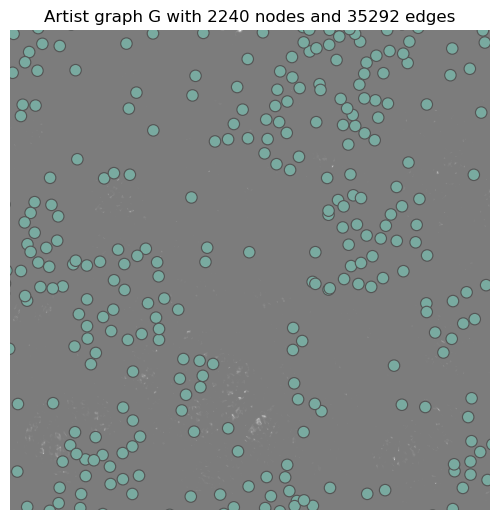

In [8]:
n, m = artists_graph.number_of_nodes(), artists_graph.number_of_edges()
fig, ax = nw.draw_netwulf(positions)
plt.title(f"Artist graph G with {n} nodes and {m} edges")
plt.savefig("data/Artist_graph.png")
plt.show()

In [9]:
""" Graph and data analysis"""


def degree_analysis(graph): 
    graph_degrees = graph.degree()
    degrees = [degree for author, degree in graph_degrees]
    sum_degrees = sum(degrees)

    average_degree = sum_degrees/len(graph_degrees)
    max_degree = max(degrees)
    min_degree = min(degrees)
    return average_degree, max_degree, min_degree

def plot_degree_distribution(graph): 
    degree_distribution = nx.degree_histogram(graph)

    plt.bar(range(len(degree_distribution)), degree_distribution)
    plt.xlabel("Degree")
    plt.ylabel("Number of artists")
    plt.title("Degree Distribution of G")
    plt.show()

The average artist degree is 31.51
The maximum degree is 180
The minimum degree is 6


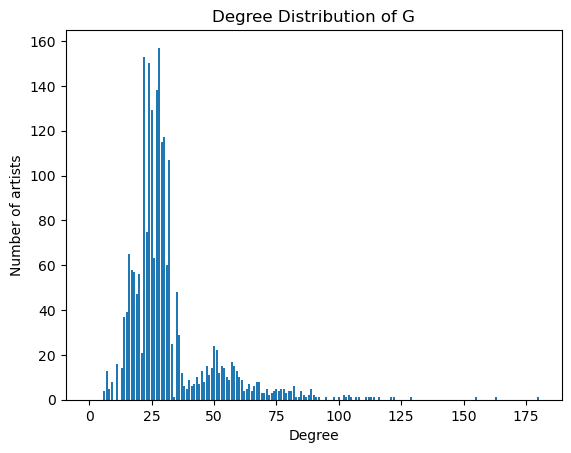

In [10]:
# Degree analysis

average_degree, max_degree, min_degree = degree_analysis(artists_graph)
print(f"The average artist degree is {round(average_degree,2)}")
print(f"The maximum degree is {(max_degree)}") 
print(f"The minimum degree is {(min_degree)}") 

plot_degree_distribution(artists_graph)


In [11]:
# Find artists that performed more than n, and find top N artists

def find_duplicate_artists(df, n, N): 
    count = df.groupby("name").size()
    duplicates = count[count > n]
    print(f"{len(duplicates)} artists performed more than {n} times.")
    top_artists = duplicates.nlargest(N)
    print("\nTop artists: ")
    for artist, nr in top_artists.items():
        print(f"{artist} performed {nr} times.")
    return duplicates.index.tolist(), top_artists 

n_times = 2
dup_artists, top_artists = find_duplicate_artists(artist_data, n_times, 5)


151 artists performed more than 2 times.

Top artists: 
Alf Alpha performed 7 times.
Gabe Real performed 7 times.
The Chemical Brothers performed 7 times.
Jimbo Jenkins performed 6 times.
Richie Hawtin performed 6 times.


In [12]:
# Check if the graph is connected by calculating number of connected components

nr_con_comp = nx.number_connected_components(artists_graph)
if nr_con_comp == 1:
    print(f"Graph G is connected")
else: 
    print(f"Number of connected components in G are {nr_con_comp}")

Graph G is connected


### Community detection 

In [13]:
import community 

In [14]:
# Find communintes based on comminuty.best_partition

communities_in_graph = community.best_partition(artists_graph)
nx.set_node_attributes(artists_graph, communities_in_graph, "group")

nr_communities = len(set(communities_in_graph.values()))
print(f"{nr_communities} communites found by best_partition")

25 communites found by best_partition


In [15]:
communities_pos, config = nw.visualize(artists_graph)

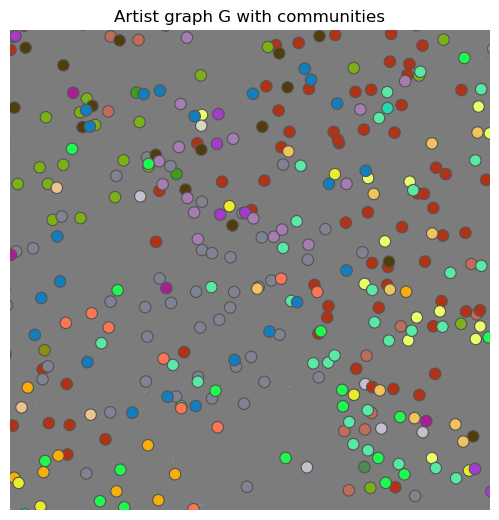

In [16]:
fig, ax = nw.draw_netwulf(communities_pos)
plt.title(f"Artist graph G with communities")
plt.savefig("data/Community_artist_graph.png")
plt.show()

In [17]:
""" A function for analysing the communitites created with best_partition, based on attribute: stage, year or genre to see if there are any correlations.
The n top attributes for each community will be printed. """

def analyse_communities(communities, graph, attribute : str, n : int):
    for community_id in set(communities.values()):
        nodes_in_community = [node for node, community in communities.items() if community == community_id]
        community_attributes = {}
        for node in nodes_in_community:
            for attr in graph.nodes[node][attribute]:
                if attr not in community_attributes:
                    community_attributes[attr] = 0
                community_attributes[attr] += 1
        
        sorted_attributes = sorted(community_attributes.items(), key=lambda x: x[1], reverse=True)
        
        print(f"Community {community_id}:")
        for attr, f in sorted_attributes[:n]:
            print(f"{attr}")


In [42]:
analyse_communities(communities_in_graph, artists_graph, "year", 3)

Community 0:
2012
2014
1999
Community 1:
2013
2010
2016
Community 2:
2007
2004
2006
Community 3:
2017
2012
2015
Community 4:
2012
2007
2015
Community 5:
2013
2008
2010
Community 6:
2013
2008
2010
Community 7:
2014
2016
2017
Community 8:
2013
2016
2019
Community 9:
2013
2014
2019
Community 10:
2015
2012
2017
Community 11:
2011
2015
2017
Community 12:
2022
2023
2017
Community 13:
2019
2023
2022
Community 14:
2009
2006
2001
Community 15:
2023
2015
2018
Community 16:
2022
2018
2016
Community 17:
2003
2009
1999
Community 18:
2023
2022
2019
Community 19:
2016
2019
2018
Community 20:
2011
2008
2002
Community 21:
2011
2009
2008
Community 22:
2014
2017
2004
Community 23:
2022
Community 24:
2022
2019
2017


In [19]:
def calc_modularity_score(graph, communities):
    community_partitions = {}
    for node, community_id in communities.items():
        if community_id not in community_partitions:
            community_partitions[community_id] = set()
        community_partitions[community_id].add(node)

    partition_list = [set(nodes) for nodes in community_partitions.values()]

    M = nx.community.modularity(graph, partition_list)

    return M 


In [20]:
M = calc_modularity_score(artists_graph, communities_in_graph)
print(f"Modularity coefficient M for the best_partition communities is {round(M,2)}")

Modularity coefficient M for the best_partition communities is 0.72


### Finding top artists in datasets

In [21]:
# Read dataset with artists and songs combined 

songs_artists_df = pd.read_csv("data/songs_and_artists_dataset.csv")

In [22]:
import ast 

In [23]:
""" A function for finding the top artist based on the n songs with the highest Spotify popularity score. 
To do this it is necessary to covert all artist from strings to list elements. It is also necessary to exclude the artist that have not performed at Coachella.
There might be some artists included in the dataset that did not perform at Coachella, since we gatherered the artists based on collaboration on songs. """

def get_top_unique_aritst(df, n):
    top_popularity_artists = df.nlargest(n, "popularity")["artist_names"].tolist()
    artist_names = []
    for item in top_popularity_artists:
        artist_names.extend(ast.literal_eval(item))

    unqiue_top_artists = ((set(artist_names)))

    # Make sure we only include Coachella artists
    top_coachella_artists = unqiue_top_artists & set(artist_data["name"])

    return top_coachella_artists


In [48]:
n = 300 
top_coachella_artists = get_top_unique_aritst(songs_artists_df, n)

print(f"{len(top_coachella_artists)} top artists found based on the {n} top songs.\n")

print("Top artists:")
for a in (top_coachella_artists): 
    print(a)

98 top artists found based on the 300 top songs.

Top artists:
TV Girl
Foo Fighters
Eric Prydz
Corinne Bailey Rae
Cardi B
Mac DeMarco
Kanye West
Disclosure
Drake
UMI
Chase & Status
boygenius
Halsey
Phoebe Bridgers
Calvin Harris
Tom Odell
Mitski
Tame Impala
Dennis Lloyd
Ellie Goulding
Future
Bad Bunny
Zedd
Declan McKenna
Bomba Estéreo
Chris Stapleton
Alessia Cara
Anitta
G-Eazy
Peter Bjorn and John
A$AP Ferg
Tiësto
Natanael Cano
Jimmy Eat World
Sia
Flo Milli
Still Woozy
Ali Gatie
The Weeknd
21 Savage
Whethan
Kendrick Lamar
Kali Uchis
DJ Khaled
Kid Cudi
Amy Winehouse
Travis Scott
Gucci Mane
The Chainsmokers
Nicki Nicole
Lil Uzi Vert
Fred again..
Pavement
FKJ
Kim Petras
Doja Cat
Alec Benjamin
David Guetta
Mild High Club
Milky Chance
Joey Bada$$
Ariana Grande
Thundercat
Metro Boomin
Baby Keem
Aphex Twin
SZA
The Neighbourhood
Stromae
Playboi Carti
Dominic Fike
The Cinematic Orchestra
Oasis
Cults
Becky G
Daft Punk
AC/DC
Eliza Doolittle
Mariah the Scientist
Sasha Alex Sloan
Major Lazer
Julian 

In [38]:
f""" Is there a correlation between the popularity of the Coachella artist (based on popularity score), 
and how many times they have performed at Coachella? This is done by calculating how many of the {len(top_coachella_artists)} that have performed more than {n_times}."""

correlation_list = list(set(dup_artists).intersection(top_coachella_artists))
print(f"{len(correlation_list)} of the top artists performed more than {n_times} times at Coachella.\n")

print("These artists are:")
for i, a in enumerate(correlation_list):
    print(f"{i+1}:", a)

22 of the top artists performed more than 2 times at Coachella.

These artists are:
1: Zedd
2: Mac DeMarco
3: Flume
4: Queens of the Stone Age
5: Tiësto
6: Disclosure
7: Major Lazer
8: Vince Staples
9: Sia
10: Benny Benassi
11: Vampire Weekend
12: David Guetta
13: Calvin Harris
14: Tame Impala
15: The Weeknd
16: Diplo
17: Ellie Goulding
18: MGMT
19: Yeah Yeah Yeahs
20: Crystal Castles
21: Justice
22: Ratatat


In [63]:
""" Here analysis of the artists that have performed several times is made, by finding the stage they perform at each year, 
and checking if they have advanced from a non-Coachella stage to a Coachella stage (which is the main stage). 
If they have advanced, it indicates that their popularity has risen. """

proceeding_artists, other_artists = 0, 0
always_popular_artists, regressing_artists = 0, 0 

names_stages = {}
for name in dup_artists: 
    filtered_df = artist_data[artist_data["name"] == name]
    stages = filtered_df['stage'].tolist()
    years = filtered_df['year'].tolist()
    if stages[-1] == "Coachella Stage" and stages[0] != "Coachella Stage":
        proceeding_artists += 1
    elif all(item == "Coachella Stage" for item in stages):
        always_popular_artists += 1
    elif stages[0] == "Coachella Stage" and stages[-1] != "Coachella Stage":
        regressing_artists += 1 
    else: 
        other_artists += 1

print(f"{proceeding_artists} out of the {len(dup_artists)} artists started out on the non main stages, and eventually proceeded to the Coachella stage.")
print(f"{always_popular_artists} artists performed on the Coachella stage all times.")
print(f"{regressing_artists} artists started out on the Coachella stage on their first peformance, and then regressed to another stage.")

44 out of the 151 artists started out on the non main stages, and eventually proceeded to the Coachella stage.
7 artists performed on the Coachella stage all times.
7 artists started out on the Coachella stage on their first peformance, and then regressed to another stage.


So, there are 151 artists that performed at Coachella more than 2 times from 1999 to 2023. One can conclude that 44 out of these 151 artists started out on the non main stages, and eventually proceeded to the Coachella stage. 7 artists performed on the Coachella stage all times, and 7 artists started out on the Coachella stage on their first peformance, and then regressed to another stage. When looking more into detail to the artists and their respective stages, one can tell that some very popular artists (as David Guetta for example) never performed on the Cochella Stage despite this popularity. This means that this is not a perfect way of measuring popularity. 

This analysis is limited to only taken into account the first and the last stage they performed at (if they did not always perform at the Coachella Stage). That is another limitation with using this specific way of measuring popularity. 


### Find the top genres of each stage 

In [214]:
# Starting out with finding the names of each unique stage/tent

stages = set(artist_data["stage"].tolist())

print(f"There are {len(stages)} possible stages at Coachella")
for i, st in enumerate(stages):
    print(f"{i+1}: {st}")


There are 10 possible stages at Coachella
1: Gobi Tent
2: Insomniac Tent
3: Sahara Tent
4: Main Stage
5: Coachella Stage
6: Outdoor Theatre
7: Mojave Tent
8: Oasis Dome
9: Sonora Tent
10: Yuma Tent


In [191]:
from collections import Counter

In [192]:
# Find the n_genres top genres for each stage, each year

def top_n_genres(row : list, n : int):
    flattened_list = [item for sublist in row for item in sublist]
    element_counts = Counter(flattened_list).most_common(n)
    top_elem = [e for (e, c) in element_counts if len(e) != 0]
    return top_elem

def convert_str_to_list(row : str): 
    try: 
        str_row = ast.literal_eval(row)
        return str_row
    except: 
        return ast.literal_eval(row)
    
def find_top_genres(df : pd.DataFrame, n : int):
    df_lists = df.copy()
    
    # Convert string to list items 
    df_lists["genres"] = df["genres"].apply(lambda row: convert_str_to_list(row))

    grouped_artist_data = df_lists.groupby(["year", "stage"])["genres"].agg(list).reset_index()
    grouped_artist_data["top_genres"] = grouped_artist_data["genres"].apply(lambda row: top_n_genres(row, n))
    grouped_artist_data = grouped_artist_data.drop(columns=["genres"])
    return grouped_artist_data

def find_top_all_stages(df : pd.DataFrame, n : int): 
    df_alL_stages = df.copy()
    df_alL_stages["top_genres"] = df_alL_stages["top_genres"]
    return df_alL_stages

In [193]:
# Top genres for each year, each tent

n_genres = 3
top_genres_df = find_top_genres(artist_data, n_genres)
top_genres_df

,year,stage,top_genres
0,1999,Gobi Tent,"[trip hop, intelligent dance music, electronica]"
1,1999,Main Stage,"[alternative rock, alternative metal, nu metal]"
2,1999,Mojave Tent,"[trip hop, electronica, downtempo]"
3,1999,Outdoor Theatre,"[electronica, alternative rock, britpop]"
4,1999,Sahara Tent,"[detroit techno, minimal techno, techno]"
...,...,...,...
119,2023,Mojave Tent,"[indie pop, art pop, metropopolis]"
120,2023,Outdoor Theatre,"[indie soul, rap, electropop]"
121,2023,Sahara Tent,"[house, bass house, minimal techno]"
122,2023,Sonora Tent,"[crank wave, pov: indie, alternative r&b]"


In [215]:
# Find top genres for each stage, all years 

all_top_genres_stage_df = top_genres_df.groupby(["stage"])["top_genres"].agg(list).reset_index()

top_genres_stage_df = all_top_genres_stage_df.copy()

top_genres_stage_df["top_genres"] = all_top_genres_stage_df["top_genres"].apply(lambda row: top_n_genres(row, n_genres))
top_genres_stage_df


,stage,top_genres
0,Coachella Stage,"[alternative rock, rock, modern rock]"
1,Gobi Tent,"[indietronica, escape room, art pop]"
2,Insomniac Tent,"[big beat, breakbeat, electronica]"
3,Main Stage,"[alternative rock, alternative metal, nu metal]"
4,Mojave Tent,"[indie rock, indietronica, electronica]"
5,Oasis Dome,"[future garage, drum and bass, classic dubstep]"
6,Outdoor Theatre,"[indie rock, indietronica, alternative rock]"
7,Sahara Tent,"[edm, electro house, pop dance]"
8,Sonora Tent,"[indie garage rock, noise pop, art pop]"
9,Yuma Tent,"[minimal techno, microhouse, house]"


In [216]:
# Save dataframes with top artists, both per stage and stage per year 

top_genres_df.to_csv("data/top_genres_stage_year.csv")
top_genres_stage_df.to_csv("data/top_genres_stage.csv")

### Make wordclouds of the genre names for each stage 

Now we want to analyse the different genres of the artist on each of the ten stages. There are many different genres as "neo", "escape room", "brooklyn" etc, and it can be interesting to collect the genres for each stage together and visualise it as a wordcloud, to identifying eventual patterns. 

In [195]:
from wordcloud import WordCloud

In [244]:
def plot_genre_wordclouds(df):
    for ind, df_row in df.iterrows():
        stage = df_row["stage"]
        flattened_genres = [item for sublist in df_row["top_genres"] for item in sublist]
        genres_str = ', '.join(flattened_genres)
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genres_str)
        
        plt.figure(figsize=(12, 3))
        plt.imshow(wordcloud)
        plt.title(f"Wordcloud based on genres from {stage}")
        plt.show()
    


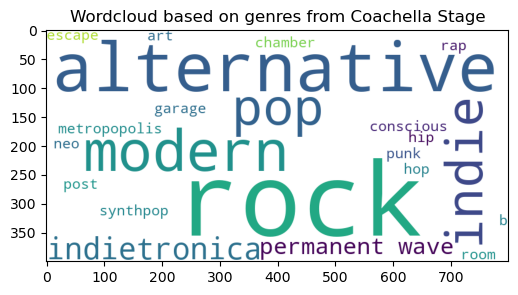

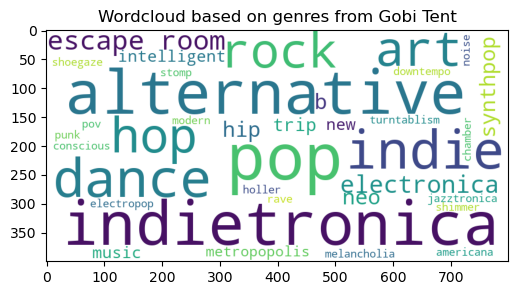

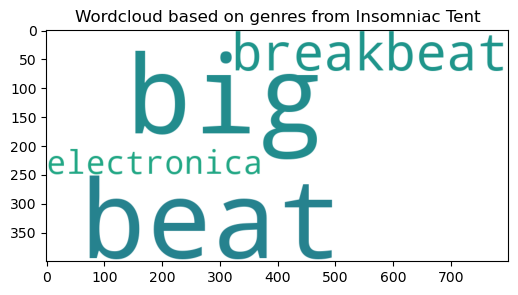

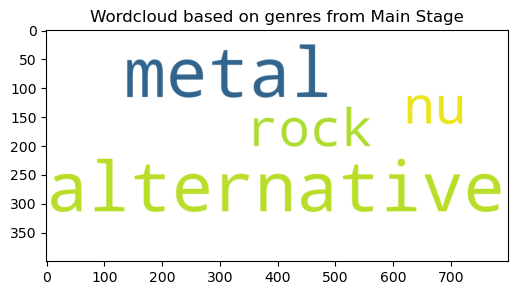

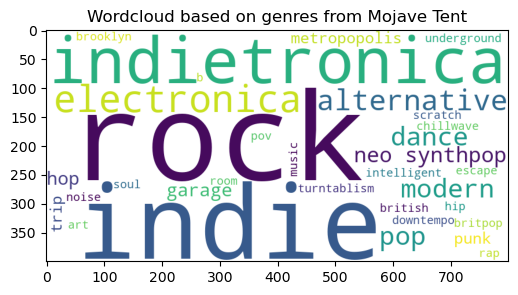

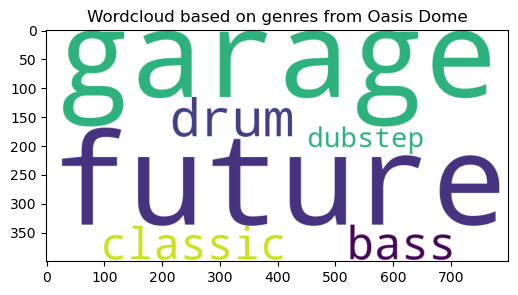

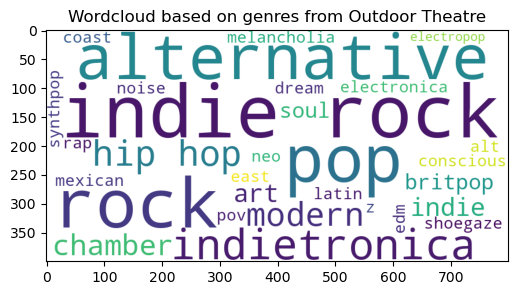

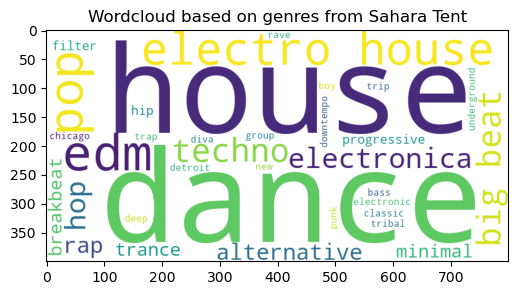

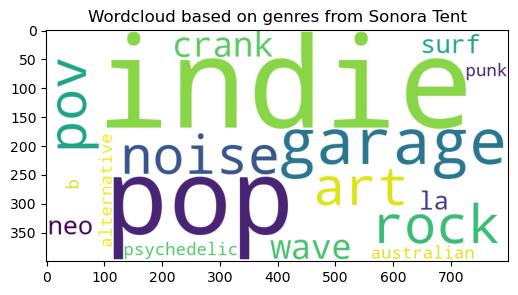

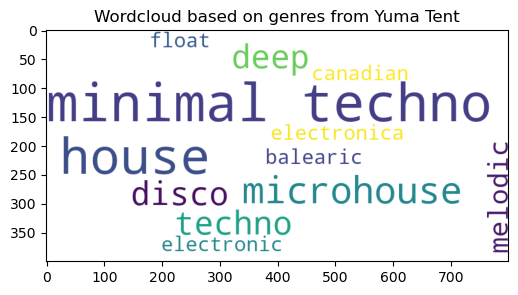

In [197]:
plot_genre_wordclouds(all_top_genres_stage_df)


## **Section 4: Discussion**

#### **What went well?**
A lot of time for this project was dedicated to collect the datasets, with Spotify and MusixMatch APIs. Originally, the plan was to do text analysis on the titles for the songs, since this was the data that was possible to gather from Spotify APIs. However, we realized that the text analysis would be to sparse with only the few words in the titles, so we managed to gather data from song lyrics from MusixMatch APIs. This was a succesful part of the project, and made the text analysis part more comprehensive. In addition, considerable amount of the sought data was accessible, so the data cleaning and handling went well. 

Furthermore, some trends were identified in the genres of each tent, which was a hypothesis of ours. For example, the genres of the Oasis Dome has genres in common that are more alternative, compared to the Sahara tent which is clearly more dance/party music.

Regarding the text analysis for the lyrics ..., we succeeded to compute semantic analysis, and see how it changed since 1999, which is an interesting result.  

#### **Areas of improvment**

Due to time limitations, we did not implement everything that we might have wanted to. For example, the network created is an undirected, unweighted network, and one can assume that it is non-random. This since the line up for each year of Coachella probably is carefully planned by the Coachella organisers, and the schedule for the artists (with different stages/tents) is most likely based on at least some criterias. However, we could have investigated whether or not the network has same characteristics as random networks. That is something that we worked with in this course, and it could have been interesting to apply to our project. 

Another area of improvments is the measurement for the artist popularity over the years, which is now executed by checking the first and the last stage that artist performed at, if they have performed repeatedly at Coachella. This measurement could have been modified to capture the stage changes over the years in a more comprehensive way, perhaps with a plot. 
